## Project: Building an NLP-Based Sentiment Analysis and Text Generation System Using Deep Learning

### Task 1: Data Preprocessing and Word Embeddings


In [35]:
pip install kaggle kagglehub

Note: you may need to restart the kernel to use updated packages.


In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("juhibhojani/airline-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airline-reviews


In [37]:
import pandas as pd

# dataset
df = pd.read_csv(f"{path}/Airline_review.csv")
print(df.head())
print(df.shape)
df = df.iloc[:1000]
print(df.shape)

   Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an... 

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [38]:
import spacy
import nltk
from nltk.corpus import stopwords

nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    doc = nlp(text.lower())  # Convert to lowercase
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return tokens

df["processed_review"] = df["Review"].apply(preprocess_text)

df["processed_review"].iloc[0]

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['moroni',
 'moheli',
 'turn',
 'pretty',
 'decent',
 'airline',
 'online',
 'booking',
 'work',
 'well',
 'checkin',
 'boarding',
 'fine',
 'plane',
 'look',
 'well',
 'maintain',
 'short',
 'flight',
 'minute',
 'expect',
 'much',
 'still',
 'manage',
 'hand',
 'bottle',
 'water',
 'biscuit',
 'though',
 'nice',
 'flight',
 'time']

In [39]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [40]:
from gensim.models import Word2Vec

sentences = df["processed_review"].tolist()

# CBOW model
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=0)
# Skip-gram model
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, sg=1)

# get vector for a word
w2v_vector_cbow = cbow_model.wv["checkin"] 
print(w2v_vector_cbow)

w2v_vector_skipgram = skipgram_model.wv["checkin"] 
print(w2v_vector_skipgram)

[-0.00152418  0.0358696   0.05777134  0.06254338 -0.01927298 -0.10956005
  0.05276167  0.11719993 -0.05943948 -0.03037285 -0.0452155  -0.08297989
 -0.05361178  0.01209607 -0.03219299 -0.07241596 -0.01444685 -0.05625296
 -0.02362716 -0.11118107 -0.00696737  0.03055287  0.01823559 -0.02108151
 -0.03686288 -0.01797706 -0.01657651 -0.07148124 -0.10776784 -0.04322117
  0.12124898 -0.05325204  0.11598873 -0.0268871  -0.03438447  0.12020963
  0.05422796 -0.0726615  -0.02378784 -0.14987087  0.05031629 -0.08106879
 -0.0257268   0.04315688  0.12700842 -0.05373327 -0.05969901 -0.03907019
  0.03255581  0.02734981  0.03046998 -0.0572985   0.00989674 -0.02534701
 -0.00582782  0.07123691  0.02174024 -0.04408633 -0.15491873  0.05658744
 -0.00761254 -0.01850637  0.03135339 -0.05572188 -0.14642636  0.006193
  0.05118854  0.03625315 -0.10317162  0.06538634  0.01042055  0.02582808
  0.04198956 -0.01596997  0.11885276  0.05528709 -0.00991171 -0.03966452
 -0.09213486 -0.00023759 -0.00288267  0.03917515 -0.1

In [41]:
import numpy as np

# GloVe
glove_path = kagglehub.dataset_download("danielwillgeorge/glove6b100dtxt")
glove_path = '/kaggle/input/glove6b100dtxt/glove.6B.100d.txt'

glove_embeddings = {}

with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype="float32")
        glove_embeddings[word] = vector

# get vector
glove_vector = glove_embeddings["checkin"]
print(glove_vector) 

[-0.17751    0.059502  -0.047082   0.21753   -0.58756   -0.18592
  0.1495    -0.19922    0.30458   -0.63959    0.19899    0.48125
  0.28958   -0.41405   -0.17649   -0.032415  -0.69328    0.94016
  0.25652    0.16727    0.335      1.1431    -0.51635   -0.71182
 -0.46344    0.34657   -0.22142    0.43457   -0.062297   0.028911
  0.085219  -0.32133    0.22884   -0.063128  -0.19693   -0.28655
 -0.69998   -0.28573    0.1215     0.10313    0.14672    0.38938
  0.10245    0.052517   0.12069   -0.10969   -0.30301    0.27114
  0.032566   0.23078   -0.13759    0.0096863 -0.5793    -0.089426
 -0.56915    0.57853    0.18783    0.39645   -0.34494   -0.32166
  0.096989  -0.0053588 -0.57706   -0.30561   -0.46239    0.52453
 -0.32215   -0.33182   -0.83812   -0.10574    0.24792    0.26254
  0.071123  -0.10909   -0.21944    0.18752    0.18233    0.23134
  0.70355   -0.10003   -0.40896   -0.37297   -0.018848  -0.18103
  0.21318   -0.22523    0.07608   -0.22971   -0.45523    0.41866
 -0.50188    0.023346  

In [42]:
from gensim.models import FastText

# FastText embeddings
sentences = df["processed_review"].tolist()

fasttext_model = FastText(sentences, vector_size=100, epochs=10)

# get vector
fasttext_vector = fasttext_model.wv["checkin"] 
print(fasttext_vector)

[-6.14774637e-02  9.99316126e-02 -5.36503270e-02 -1.57889411e-01
  2.55966693e-01 -5.26694171e-02 -1.47717986e-02  3.01616162e-01
  7.33636320e-02 -4.84615564e-01  5.06187305e-02 -1.52964234e-01
 -6.85447603e-02  3.21736723e-01 -5.64680360e-02 -2.81790078e-01
  4.40589123e-04 -1.62516922e-01 -1.62784174e-01 -2.25698799e-01
 -1.23070195e-01  1.09268270e-01 -3.61696959e-01 -1.49996772e-01
  2.20763296e-01 -2.59389371e-01  7.71956220e-02 -5.91844432e-02
  2.64845967e-01 -1.90169274e-04 -2.96768285e-02 -4.06161323e-02
  4.18512344e-01  1.21774465e-01 -1.47766307e-01  2.59381533e-01
  7.36426190e-02  1.62182271e-01 -3.39073837e-01  7.56153986e-02
  3.30899268e-01 -4.38133627e-01  2.95953881e-02 -3.11360717e-01
 -3.31290752e-01 -1.79478109e-01 -6.62493408e-02 -2.82556027e-01
 -1.44320624e-02  7.19508678e-02  2.90696591e-01  6.84330389e-02
 -3.10671590e-02 -1.86538592e-01  6.89651025e-03 -1.12167709e-01
 -3.76508199e-02  1.28660902e-01 -2.30793208e-01 -5.12309633e-02
  3.60134006e-01 -1.59629

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine similarity
similarity_w2v_glove = cosine_similarity([w2v_vector_cbow], [glove_vector])[0][0]
similarity_w2v_fasttext = cosine_similarity([w2v_vector_cbow], [fasttext_vector])[0][0]
similarity_glove_fasttext = cosine_similarity([glove_vector], [fasttext_vector])[0][0]

print(f"Word2Vec and GloVe Similarity: {similarity_w2v_glove:.4f}")
print(f"Word2Vec and FastText Similarity: {similarity_w2v_fasttext:.4f}")
print(f"GloVe and FastText Similarity: {similarity_glove_fasttext:.4f}")

Word2Vec Similarity: -0.0283
GloVe Similarity: 0.2296
FastText Similarity: -0.0933


In [44]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

words = df["processed_review"].iloc[0]

# Get word vectors for words from first review in dataset
vectors_w2v = np.array([cbow_model.wv[word] for word in words if word in cbow_model.wv])
vectors_glove = np.array([glove_embeddings[word] for word in words if word in glove_embeddings])
vectors_fasttext = np.array([fasttext_model.wv[word] for word in words if word in fasttext_model.wv])

print("Word2Vec CBOW shape:", vectors_w2v.shape)
print("GloVe shape:", vectors_glove.shape)
print("FastText shape:", vectors_fasttext.shape)

Word2Vec CBOW shape: (30, 100)
GloVe shape: (32, 100)
FastText shape: (32, 100)


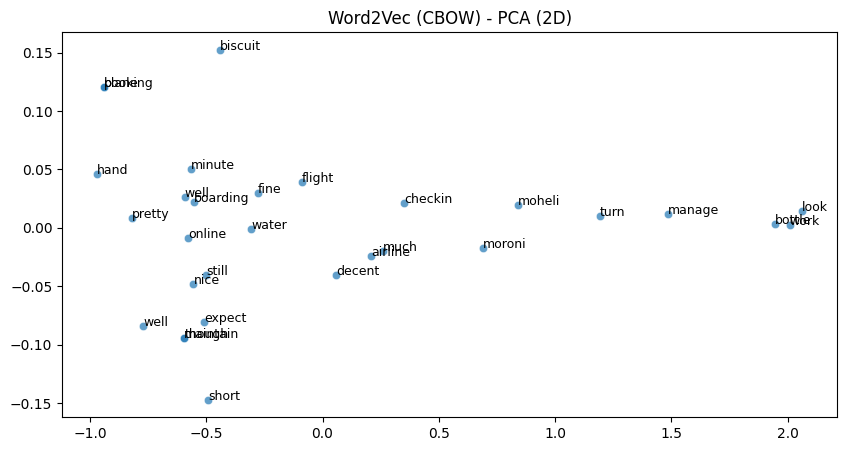

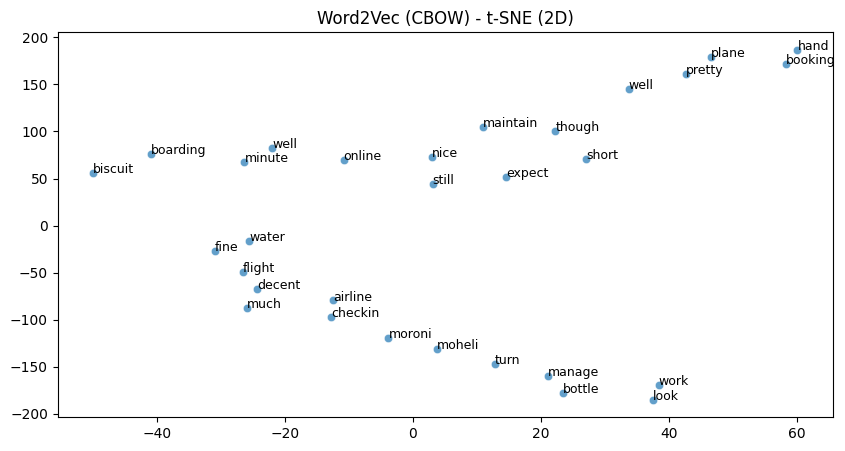

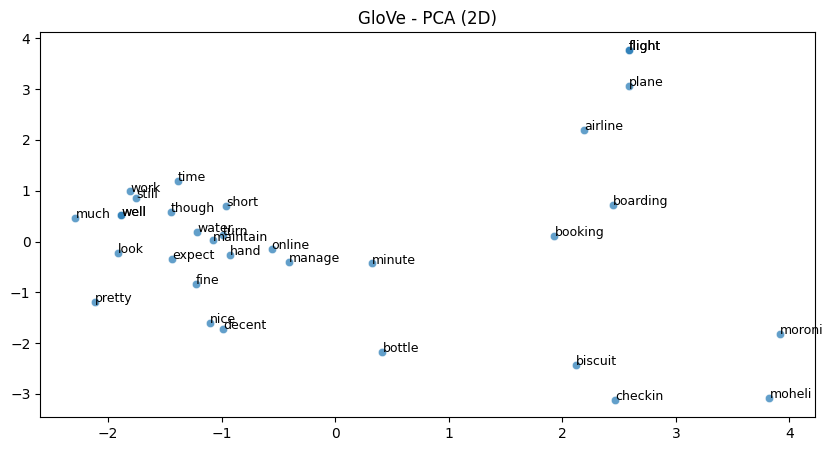

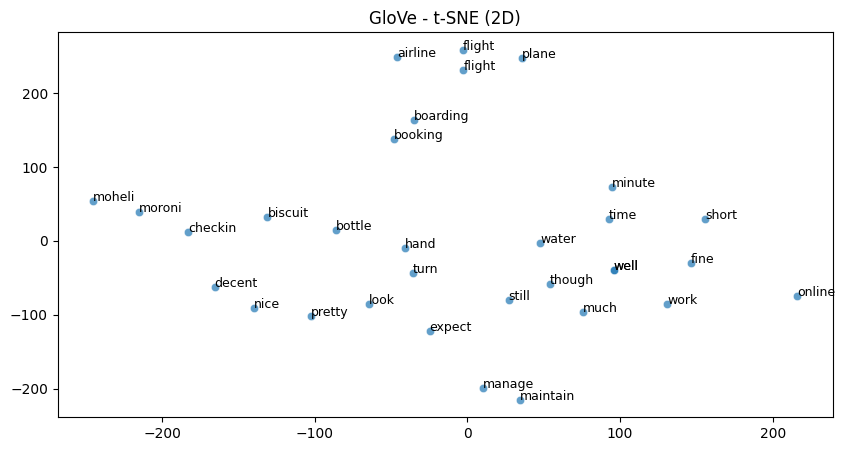

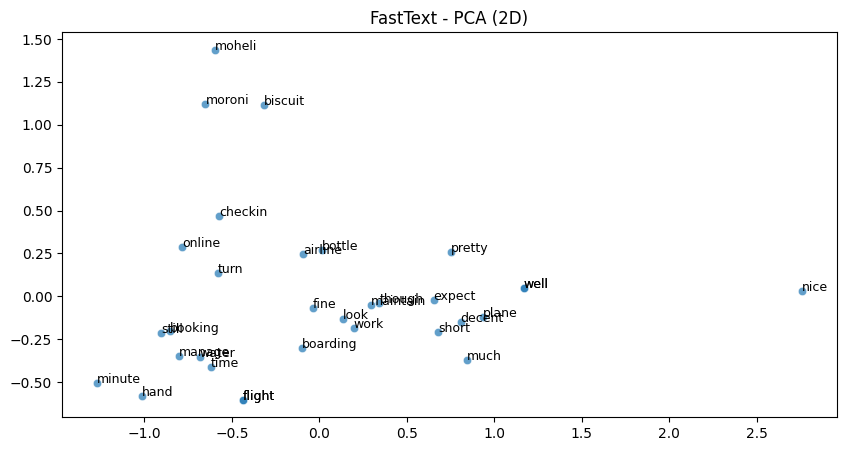

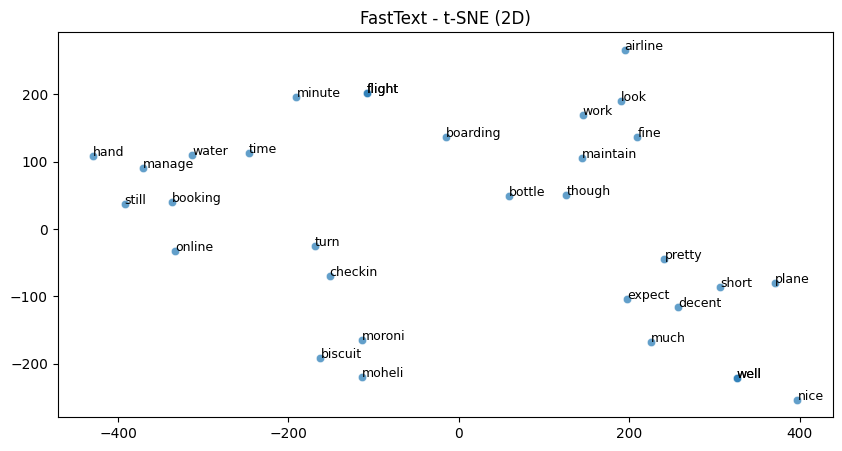

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_embeddings(vectors, title):
    # PCA (2D)
    pca = PCA(n_components=2)
    vectors_pca = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=vectors_pca[:, 0], y=vectors_pca[:, 1], alpha=0.7)
    plt.title(f"{title} - PCA (2D)")
    for i, word in enumerate(words[:len(vectors_pca)]):  
        plt.text(vectors_pca[i, 0], vectors_pca[i, 1], word, fontsize=9)
    plt.show()

    # t-SNE (2D)
    tsne = TSNE(n_components=2, perplexity=min(5, vectors.shape[0]-1), random_state=42)
    vectors_tsne = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=vectors_tsne[:, 0], y=vectors_tsne[:, 1], alpha=0.7)
    plt.title(f"{title} - t-SNE (2D)")
    for i, word in enumerate(words[:len(vectors_tsne)]):  
        plt.text(vectors_tsne[i, 0], vectors_tsne[i, 1], word, fontsize=9)
    plt.show()

visualize_embeddings(vectors_w2v, "Word2Vec (CBOW)")
visualize_embeddings(vectors_glove, "GloVe")
visualize_embeddings(vectors_fasttext, "FastText")

## Task 2: Building Recurrent Neural Networks for Sentiment Analysis

In [46]:
# Convert to binary labels
df['Sentiment'] = df['Recommended'].map({'yes': 1, 'no': 0})
df = df[['processed_review', 'Sentiment']]

print(df.head())

                                    processed_review  Sentiment
0  [moroni, moheli, turn, pretty, decent, airline...          1
1  [moroni, anjouan, small, airline, ticket, advi...          0
2  [anjouan, dzaoudzi, small, airline, airline, b...          0
3  [please, favor, fly, adria, route, munich, pri...          0
4  [book, flight, airline, friend, return, sofia,...          0


In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenization
max_words = 10000  
max_len = 100 
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df["processed_review"])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["processed_review"])
X = pad_sequences(sequences, maxlen=max_len)
y = df["Sentiment"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Sample processed review:", df["processed_review"].iloc[0])
print("Sequence:", sequences[0])

Sample processed review: ['moroni', 'moheli', 'turn', 'pretty', 'decent', 'airline', 'online', 'booking', 'work', 'well', 'checkin', 'boarding', 'fine', 'plane', 'look', 'well', 'maintain', 'short', 'flight', 'minute', 'expect', 'much', 'still', 'manage', 'hand', 'bottle', 'water', 'biscuit', 'though', 'nice', 'flight', 'time']
Sequence: [2368, 3150, 326, 423, 445, 3, 185, 252, 116, 46, 1053, 52, 236, 21, 157, 46, 816, 124, 2, 69, 210, 126, 84, 295, 159, 592, 130, 1216, 129, 96, 2, 4]


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# RNN
model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    SimpleRNN(128, activation='tanh', return_sequences=True, dropout=0.2),
    SimpleRNN(64, activation='tanh', return_sequences=False, dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [49]:
def compute_gradients(model, x_sample, y_sample):
    with tf.GradientTape() as tape:
        y_pred = model(x_sample, training=True)
        loss = tf.keras.losses.binary_crossentropy(tf.reshape(y_sample, (-1, 1)), y_pred)
        loss = tf.reduce_mean(loss)
    grads = tape.gradient(loss, model.trainable_variables)
    return [tf.norm(g).numpy() if g is not None else 0 for g in grads] 

In [50]:
gradient_history = []
history = []
for epoch in range(20):
    hist = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test), verbose=1)
    
    gradients = compute_gradients(model, X_train[:32], y_train[:32])
    gradient_history.append(gradients)
    history.append(hist.history)


gradient_history = np.array(gradient_history)
history_dict = {
    'accuracy': [h['accuracy'][0] for h in history],
    'val_accuracy': [h['val_accuracy'][0] for h in history],
    'loss': [h['loss'][0] for h in history],
    'val_loss': [h['val_loss'][0] for h in history]
}

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.5585 - loss: 0.6977 - val_accuracy: 0.6450 - val_loss: 0.6586
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6617 - loss: 0.6507 - val_accuracy: 0.6450 - val_loss: 0.6531
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6895 - loss: 0.6322 - val_accuracy: 0.6450 - val_loss: 0.6500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6827 - loss: 0.6315 - val_accuracy: 0.6450 - val_loss: 0.6517
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7129 - loss: 0.5803 - val_accuracy: 0.6400 - val_loss: 0.6566
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6090 - loss: 0.6690 - val_accuracy: 0.3600 - val_loss: 0.7154
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6375 - loss: 0.7029 - val_accuracy: 0.6550 - val_loss: 0.6803
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5955 - loss: 0.6876 - val_accuracy: 0.6450 - val_loss: 0.6577
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6922 - loss: 0.615

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5924 - loss: 0.7328 
Test Accuracy: 0.6000


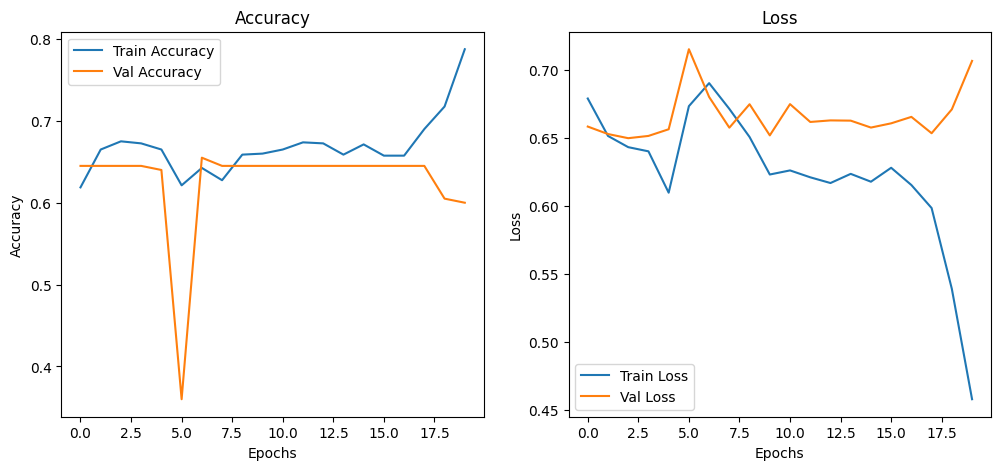

In [51]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss")

plt.show()

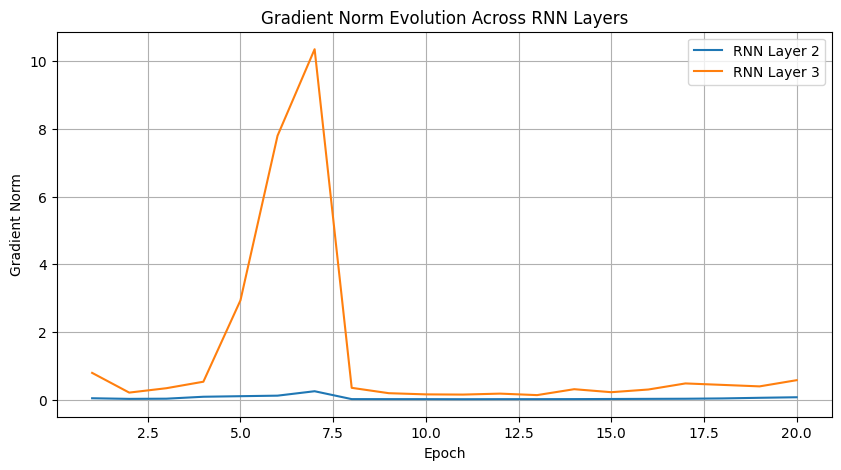

In [52]:
rnn_layer_indices = [i for i, layer in enumerate(model.layers) if isinstance(layer, (tf.keras.layers.SimpleRNN, tf.keras.layers.LSTM, tf.keras.layers.GRU))]

plt.figure(figsize=(10, 5))
for i in rnn_layer_indices:
    plt.plot(range(1, 21), gradient_history[:, i], label=f"RNN Layer {i+1}")
    
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm Evolution Across RNN Layers")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
import time

# LSTM
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    LSTM(128, activation='tanh', return_sequences=True, dropout=0.2),
    LSTM(64, activation='tanh', return_sequences=False, dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = time.time()
history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
lstm_time = time.time() - start_time

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6498 - loss: 0.6591 - val_accuracy: 0.7200 - val_loss: 0.5229
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7997 - loss: 0.4205 - val_accuracy: 0.8050 - val_loss: 0.4288
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9282 - loss: 0.2297 - val_accuracy: 0.8200 - val_loss: 0.4653
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9692 - loss: 0.0946 - val_accuracy: 0.8350 - val_loss: 0.6560
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9876 - loss: 0.0641 - val_accuracy: 0.8350 - val_loss: 0.5671
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9951 - loss: 0.0195 - val_accuracy: 0.8200 - val_loss: 0.7480
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.8300 - val_loss: 0.8388
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8150 - v

In [54]:
# GRU
gru_model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    GRU(128, activation='tanh', return_sequences=True, dropout=0.2),
    GRU(64, activation='tanh', return_sequences=False, dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = time.time()
history_gru = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
gru_time = time.time() - start_time

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6567 - loss: 0.6737 - val_accuracy: 0.6450 - val_loss: 0.6316
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7056 - loss: 0.5388 - val_accuracy: 0.7900 - val_loss: 0.4722
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8963 - loss: 0.2700 - val_accuracy: 0.7850 - val_loss: 0.5193
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9705 - loss: 0.1201 - val_accuracy: 0.7650 - val_loss: 0.7297
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9902 - loss: 0.0465 - val_accuracy: 0.7500 - val_loss: 0.9299
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9996 - loss: 0.0099 - val_accuracy: 0.7250 - val_loss: 1.3328
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.7250 - val_loss: 1.3927
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.7150 - v

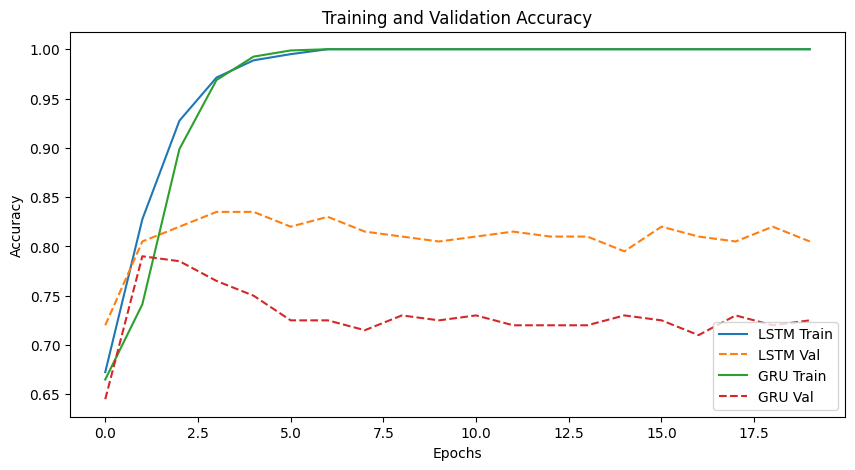

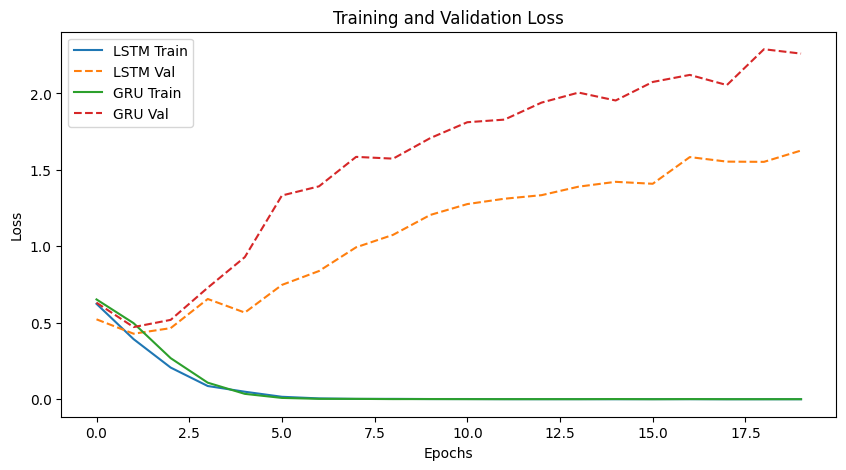

Training Time: LSTM = 9.84s, GRU = 9.05s


In [55]:
# Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history["accuracy"], label="LSTM Train")
plt.plot(history_lstm.history["val_accuracy"], label="LSTM Val", linestyle="dashed")
plt.plot(history_gru.history["accuracy"], label="GRU Train")
plt.plot(history_gru.history["val_accuracy"], label="GRU Val", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history["loss"], label="LSTM Train")
plt.plot(history_lstm.history["val_loss"], label="LSTM Val", linestyle="dashed")
plt.plot(history_gru.history["loss"], label="GRU Train")
plt.plot(history_gru.history["val_loss"], label="GRU Val", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Time
print(f"Training Time: LSTM = {lstm_time:.2f}s, GRU = {gru_time:.2f}s")

## Task 4: Text Generation with LSTM

In [57]:
df = pd.read_csv(f"{path}/Airline_review.csv")

In [58]:
reviews = df["Review"].astype(str).tolist()[:50]

In [59]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for review in reviews:
    token_list = tokenizer.texts_to_sequences([review])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

# padding
max_seq_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_length, padding='pre')

# X (input) and y (next word)
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [60]:
model = Sequential([
    Embedding(total_words, 100, input_length=max_seq_length-1),
    LSTM(256, return_sequences=True),
    LSTM(128),
    Dense(128, activation='relu'),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=70, verbose=2)

Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


165/165 - 8s - 48ms/step - accuracy: 0.0310 - loss: 6.4566
Epoch 2/70
165/165 - 6s - 34ms/step - accuracy: 0.0355 - loss: 6.0948
Epoch 3/70
165/165 - 6s - 34ms/step - accuracy: 0.0382 - loss: 5.9793
Epoch 4/70
165/165 - 6s - 35ms/step - accuracy: 0.0490 - loss: 5.8685
Epoch 5/70
165/165 - 6s - 35ms/step - accuracy: 0.0530 - loss: 5.7660
Epoch 6/70
165/165 - 6s - 35ms/step - accuracy: 0.0547 - loss: 5.6748
Epoch 7/70
165/165 - 6s - 35ms/step - accuracy: 0.0576 - loss: 5.5780
Epoch 8/70
165/165 - 6s - 35ms/step - accuracy: 0.0570 - loss: 5.4721
Epoch 9/70
165/165 - 6s - 34ms/step - accuracy: 0.0637 - loss: 5.3692
Epoch 10/70
165/165 - 6s - 34ms/step - accuracy: 0.0659 - loss: 5.2820
Epoch 11/70
165/165 - 6s - 34ms/step - accuracy: 0.0713 - loss: 5.1991
Epoch 12/70
165/165 - 6s - 34ms/step - accuracy: 0.0802 - loss: 5.0959
Epoch 13/70
165/165 - 6s - 34ms/step - accuracy: 0.0865 - loss: 4.9866
Epoch 14/70
165/165 - 6s - 34ms/step - accuracy: 0.0984 - loss: 4.8649
Epoch 15/70
165/165 - 6s -

In [61]:
def generate_review(seed_text, next_words=20):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')

        predictions = model.predict(token_list, verbose=0)[0]
        next_word_index = np.argmax(predictions)  # select the word with the highest probability
        next_word = tokenizer.index_word.get(next_word_index, "")

        if next_word:
            seed_text += " " + next_word
        else:
            break 
    
    return seed_text

In [63]:
print(generate_review("The flight was", next_words=15))

The flight was many connection to vienna after all both took small and cramped cabin in time took


In [66]:
print(generate_review("Do not book", next_words=20))

Do not book a flight with this airline my friend and i should have returned from sofia to amsterdam on september 22 and


## Task 5: Improving Performance with Bidirectional LSTM

In [81]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import time

# Bi-LSTM
bilstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    Bidirectional(LSTM(128, activation='tanh', return_sequences=True, dropout=0.2)),
    Bidirectional(LSTM(64, activation='tanh', return_sequences=False, dropout=0.2)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

start_time = time.time()
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
bilstm_time = time.time() - start_time

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6270 - loss: 0.6697 - val_accuracy: 0.6750 - val_loss: 0.5712
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7678 - loss: 0.4709 - val_accuracy: 0.8300 - val_loss: 0.4470
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9005 - loss: 0.2866 - val_accuracy: 0.8250 - val_loss: 0.4169
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9639 - loss: 0.1380 - val_accuracy: 0.8400 - val_loss: 0.5412
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9880 - loss: 0.0455 - val_accuracy: 0.8200 - val_loss: 0.5618
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9913 - loss: 0.0262 - val_accuracy: 0.8100 - val_loss: 0.6872
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 0.8100 - val_loss: 0.8776
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.8150 - v

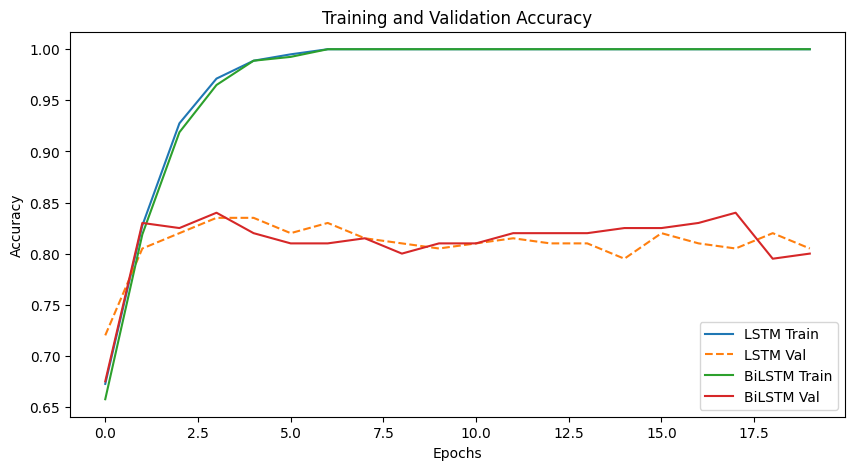

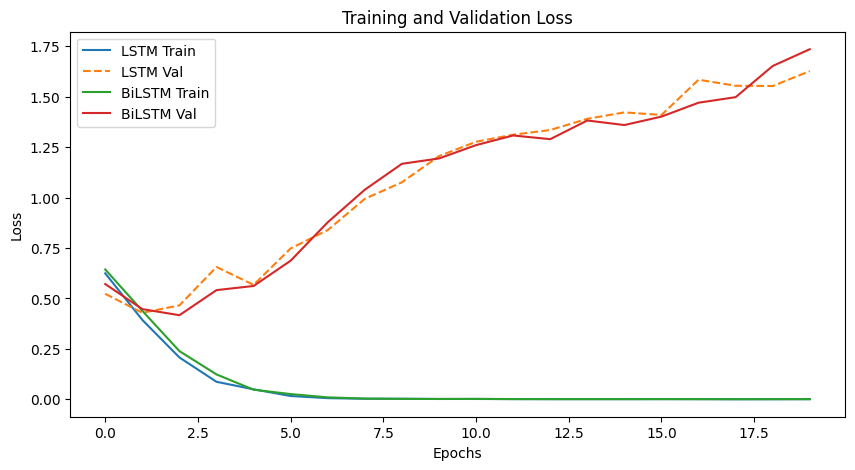

Training Time: LSTM = 9.84s
Training time: Bidirectional LSTM: 10.57 s


In [83]:
# Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history["accuracy"], label="LSTM Train")
plt.plot(history_lstm.history["val_accuracy"], label="LSTM Val")
plt.plot(history_bilstm.history['accuracy'], label='BiLSTM Train')
plt.plot(history_bilstm.history['val_accuracy'], label='BiLSTM Val')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history["loss"], label="LSTM Train")
plt.plot(history_lstm.history["val_loss"], label="LSTM Val", linestyle="dashed")
plt.plot(history_bilstm.history['loss'], label='BiLSTM Train')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Val')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Time
print(f"Training Time: LSTM = {lstm_time:.2f}s")
print(f"Training time: Bidirectional LSTM: {bilstm_time:.2f} s")

#### 